<a href="https://www.inove.com.ar"><img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center"></a>


# Procesamiento de lenguaje natural
## LSTM many-to-many

### Datos
El objecto es utilizar una serie de sucuencias númericas (datos sintéticos) para poner a prueba el uso de las redes LSTM. Este ejemplo se inspiró en otro artículo, lo tienen como referencia en el siguiente link:\
[LINK](https://stackabuse.com/solving-sequence-problems-with-lstm-in-keras-part-2/)

In [ ]:
import re

import numpy as np
import pandas as pd

from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM, SimpleRNN
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional

In [ ]:
# Generar datos sintéticos
X = list()
y = list()

# En ambos casos "X" e "y" son vectores de números de 5 en 5
X = [x for x in range(5, 301, 5)]
y = [x+15 for x in X]

print(f"datos X (len={len(X)}):", X)
print(f"datos y (len={len(y)}):", y)

datos X (len=60): [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300]
datos y (len=60): [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315]


In [ ]:
# Se desea agrupar los datos de a 3 elementos
X = np.array(X).reshape(len(X)//3, 3, 1)
y = np.array(y).reshape(len(y)//3, 3, 1)
print("datos X[0:2]:", X[0:2])
print("datos y[0:2]:", y[0:2])

datos X[0:2]: [[[ 5]
  [10]
  [15]]

 [[20]
  [25]
  [30]]]
datos y[0:2]: [[[20]
  [25]
  [30]]

 [[35]
  [40]
  [45]]]


In [ ]:
# Verificamos que la secuencia enetrada es igual a la secuencia de salida
# en cuanto a dimensiones
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (20, 3, 1)
y shape: (20, 3, 1)


In [ ]:
# Cardenalidad (cantidad de elementos distintos en el dataset)
data = np.append(X, y)
len(np.unique(data))

63

### 2 - Entrenar el modelo

In [ ]:
input_shape = X[0].shape
input_shape

(3, 1)

In [ ]:
output_shape = y[0].shape
output_shape

(3, 1)

In [ ]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

model = Sequential()

# input LSTM layer
# Aquí se transformar las entradas en features
model.add(LSTM(128, activation='relu', input_shape=input_shape))

# repeat vector
# Esta capa repite cada salida individual de la capa anterior
# permitiendo que las 3 entradas del encoder se ejecuten
# en una capa de repetición de 3 time steps
model.add(RepeatVector(3))

# output LSTM layer
# Aquí los features se preparan para transformarse en una salida 3x1
model.add(LSTM(128, activation='relu', return_sequences=True))

# Aquí se computa en cada time-step una salida individual, obtiendose
# al final 3 salidas individuales (3x1)
model.add(TimeDistributed(Dense(1)))
model.compile(loss='mse',
              optimizer="Adam")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 3, 128)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 3, 128)            131584    
_________________________________________________________________
time_distributed (TimeDistri (None, 3, 1)              129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_________________________________________________________________


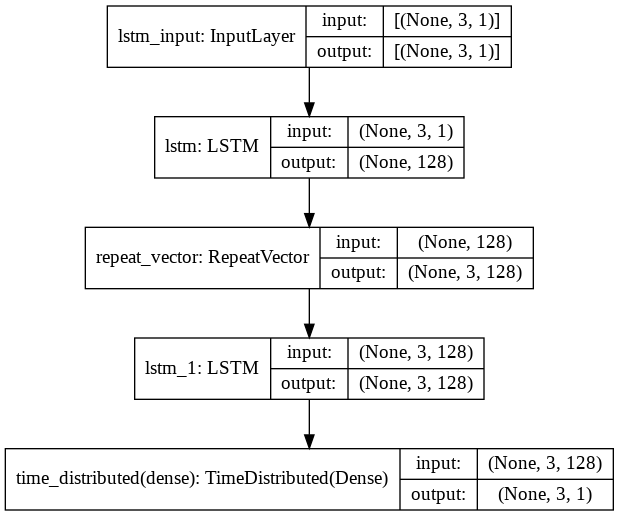

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Esta arquitectura comple lo solicitado, pero es bastante limitada y rebuscada. En el futuro y otros ejemplos veremos la arquitectura tipo encoder-decoder que es más flexible y "simétrica" que la utilizada en este caso.

In [ ]:
hist = model.fit(X, y, epochs=500, validation_split=0.2, batch_size=5)

Epoch 1/500
4/4 [==============================] - 3s 121ms/step - loss: 22608.6953 - val_loss: 68000.2656
Epoch 2/500
4/4 [==============================] - 0s 13ms/step - loss: 18417.9082 - val_loss: 51767.9570
Epoch 3/500
4/4 [==============================] - 0s 13ms/step - loss: 13445.2393 - val_loss: 27376.5762
Epoch 4/500
4/4 [==============================] - 0s 13ms/step - loss: 6866.0234 - val_loss: 23952.5469
Epoch 5/500
4/4 [==============================] - 0s 12ms/step - loss: 5882.8721 - val_loss: 18224.2832
Epoch 6/500
4/4 [==============================] - 0s 11ms/step - loss: 4940.6514 - val_loss: 16285.7197
Epoch 7/500
4/4 [==============================] - 0s 12ms/step - loss: 4334.7603 - val_loss: 13292.3018
Epoch 8/500
4/4 [==============================] - 0s 14ms/step - loss: 3584.5593 - val_loss: 10218.7139
Epoch 9/500
4/4 [==============================] - 0s 12ms/step - loss: 2567.4397 - val_loss: 7378.2827
Epoch 10/500
4/4 [==============================] - 

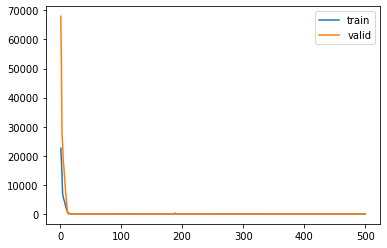

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento
epoch_count = range(1, len(hist.history['loss']) + 1)
sns.lineplot(x=epoch_count,  y=hist.history['loss'], label='train')
sns.lineplot(x=epoch_count,  y=hist.history['val_loss'], label='valid')
plt.show()

In [ ]:
# Ensayo
x_test = [20, 25, 30]
y_test = [x+15 for x in x_test]

test_input = np.array([x_test])
test_input = test_input.reshape((1, 3, 1))
y_hat = model.predict(test_input, verbose=0)[0]

print("y_test:", y_test)
print("y_hat:", y_hat[0], y_hat[1], y_hat[2])

model.evaluate(test_input, np.array([y_test]))

y_test: [35, 40, 45]
y_hat: [35.17215] [40.232098] [45.219185]
1/1 [==============================] - 0s 283ms/step - loss: 0.0438


0.04384894296526909